# Sentiment  analysis (Kamran Ashraf)

In [ ]:
'''
    Repeat for each file unless the all files are read
    a)Initialize two variables, one for total positive score and other for total negative score both to be 0.0
    b)Repeat for each sentence in the file unless all sentences of the file are read
        i)Tokenize each sentence
        ii)Create tagged element sets with each word
        iii)Keep only the words with common noun tags, adjectives tag and adverbs tag and discard all others.
        iv)Calculate the positive as well as negative score of this word and add it to the sentence.
        v)If the sentence contains a "not" word or any negation word like that,interchange the positive & negative scores
        vi)Calculate overall score of the sentence, positive or negative and store it along with sentences.
    c)Output and Write this aspect‟s positive score and negative score
    d)Display the most positive and negative sentiment sentences.
    e)Calculate overall score of this aspect
    3)    End Procedure.
'''

In [20]:
import os
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.corpus import sentiwordnet as swn

import numpy as np 
import matplotlib.pyplot as plt 

from nltk.sentiment.vader import SentimentIntensityAnalyzer
# import matplotlib as mltp

In [21]:
# Path for aspects file reading
aspectsDirPath = os.path.join(os.getcwd() , 'aspectDir')
unprocessFilesPath = os.path.join(aspectsDirPath , 'unprocessDataDir')


Files = os.listdir(unprocessFilesPath)
print(f"Aspects Files :: {Files}") 

Aspects Files :: ['Facility.txt', 'Location.txt', 'Meal.txt', 'Others.txt', 'Quality.txt', 'Room.txt', 'Service.txt', 'Staff.txt', 'Surrounding.txt', 'Value.txt']


In [22]:
class Sentance():
    def __init__(self, sentance, score):
        self.sentance = sentance
        self.score = score
        
    def __str__(self):
        return self.sentance
    
class Aspect_Sentances():
    def __init__(self, aspect_name):
        self.aspect_name = aspect_name
        self.total_positive_score, self.total_neutral_score, self.total_negative_score = 0, 0, 0
        self.positive_sentances, self.negative_sentances, self.neutral_sentances = [], [], []
        self.all_sentances = [self.negative_sentances, self.neutral_sentances, self.positive_sentances]
        for i in range(0, 3):
            for j in range(0, 3):
                self.all_sentances[j].append(Sentance('', 0))
        
    def add_sentance_with_score(self, sentance, *score):

        self.total_negative_score += score[0]
        self.total_neutral_score += score[1]
        self.total_positive_score += score[2]

        for x in range(0, 3):
            if(self.all_sentances[x][2].score < score[x]):
                if(self.all_sentances[x][1].score > score[x]):
                    self.all_sentances[x][2] = Sentance(sentance, score[x])
                elif(self.all_sentances[x][0].score > score[x]):
                    self.all_sentances[x][2] = self.all_sentances[x][1]
                    self.all_sentances[x][1] = Sentance(sentance, score[x])
                else:
                    self.all_sentances[x][2],self.all_sentances[x][1]=self.all_sentances[x][1],self.all_sentances[x][0]
                    self.all_sentances[x][0] = Sentance(sentance, score[x])
                        
    def get_scores(self):
        return [self.total_negative_score, self.total_neutral_score, self.total_positive_score]
                        
    def __str__(self):
        posSent = '  '
        negSent = '  ' 
        neuSent = '  '
        for i in self.positive_sentances:
            posSent += i.sentance+'  '
        for i in self.negative_sentances:
            negSent += i.sentance+'  '
        for i in self.neutral_sentances:
            neuSent += i.sentance+'  '
        print_out = f''' Aspect :: {self.aspect_name}\n Positive comments :: \n{posSent} Negative comments :: \n {negSent}'''
        if(self.total_neutral_score >= 0):
            print_out += f''' Neutral comments :: \n {neuSent}\n''' 
        return print_out

In [23]:
def processSentance(_sentance, outputType=''):
    ''''''
    sentance = word_tokenize(_sentance)             #     Word tokenize 
    sentance = pos_tag(sentance)                    #     POS tagging
    if( outputType == 'vader'):
        sentance_list = [word for word, tag in sentance if (tag.startswith('J') or tag.startswith('N') or tag.startswith('R'))]
        return ' '.join(sentance_list)
    return [(word, tag) for word, tag in sentance if (tag.startswith('J') or tag.startswith('N') or tag.startswith('R'))]


'''  The POS tags that senti_synset accepts :: ('n') NOUN , ('a') ADJECTIVE , ('r') ADVERB  '''
def convert_tag(sentance):
    properTaggedList = []
    for (word, tag) in sentance:
        if tag.startswith('J'):
            properTaggedList.append((word, 'a'))
        elif tag.startswith('N'):
            properTaggedList.append((word, 'n'))
        elif tag.startswith('R'):
            properTaggedList.append((word, 'r'))
    return properTaggedList
            
    
def getScore(sentance):
    hasNegation = False
    posScore = 0
    negScore = 0
    
    for token, tag in sentance:
        obj = list(swn.senti_synsets(token, tag))
        if not obj:
            continue
        else:
            posScore = posScore + obj[0].pos_score()
            negScore = negScore + obj[0].neg_score()
        if token in negationWords:
            hasNegation = True
    if hasNegation:
#         print("before neg", posScore, negScore)   #for testing
        posScore, negScore = negScore, posScore
#         print("after neg", posScore, negScore)   #for testing
    return [negScore, posScore]

negationWords = ["not", "n't"]

In [24]:
aspect_objs = [] #
vader_aspect_objs = [] #
count = 0

for aspectFile in Files:
    aspect_objs.append( Aspect_Sentances(aspectFile.split('.')[0]))
    vader_aspect_objs.append( Aspect_Sentances(aspectFile.split('.')[0]))
    
sia = SentimentIntensityAnalyzer()    

for aspectFile in Files:
    with open(os.path.join(unprocessFilesPath, aspectFile), 'r', encoding="utf-8") as file:
        
        fileData = file.readlines()
        
        for _sentance in fileData:
#             Tokenize and tag the sentance and returns the list containing only 
            sentance = processSentance(_sentance)
        
#             convert the tag suitable for senti_synsents and return it
            sentance = convert_tag(sentance)

#             returns the scores of the sentance
            score = getScore(sentance)
    
            score.insert(1, -1)
            aspect_objs[count].add_sentance_with_score(_sentance, *score)
            
            sentance = processSentance(_sentance, 'vader')
            score = sia.polarity_scores(sentance)
            score = [score['neg'], score['neu'], score['pos']]
            vader_aspect_objs[count].add_sentance_with_score(_sentance, *score)
        count = count+1
            

In [25]:
aspect = []
aspectPosScore = []
aspectNegScore = []
aspectNeuScore = []
vaderAspectPosScore = []
vaderAspectNegScore = []
vaderAspectNeuScore = []

for i in range(0, 10):
    aspect.append( Files[i].split('.')[0])
    [negScore, neuScore, posScore] = aspect_objs[i].get_scores()
    aspectPosScore.append( posScore)
    aspectNegScore.append( negScore)
    aspectNeuScore.append( neuScore)
    [negScore, neuScore, posScore] = vader_aspect_objs[i].get_scores()
    vaderAspectPosScore.append( posScore)
    vaderAspectNegScore.append( negScore)
    vaderAspectNeuScore.append( neuScore)
    
for obj in vader_aspect_objs:
    print(obj)

 Aspect :: Facility
 Positive comments :: 
  wifi us good!
  the free internet was good.
  good free wifi.
   Negative comments :: 
   wifi poor
  the blankets looked old, used and didn't seem clean.
  regretfully it wasn't so attractive as we hoped just after good recommendations in internet.
   Neutral comments :: 
   finally when we got there we had to pay a lot more than it had said on the website!
  this was quickly and politely resolved.
  got an uber from the airport (approx 4000 rupees).
  

 Aspect :: Location
 Positive comments :: 
  cheers,
  it is okay.
  okay.
   Negative comments :: 
   bad experience.
  all in all a bad experience.
  bad experience.
   Neutral comments :: 
   5 minutes walk from railway station convenient to travel to other city.
  the place is near by the metro, it will help you a lot.
  / sim card at normal price !
  

 Aspect :: Meal
 Positive comments :: 
  great free breakfast.
  free breakfast was great.
  free breakfast is a bonus.
   Negative com

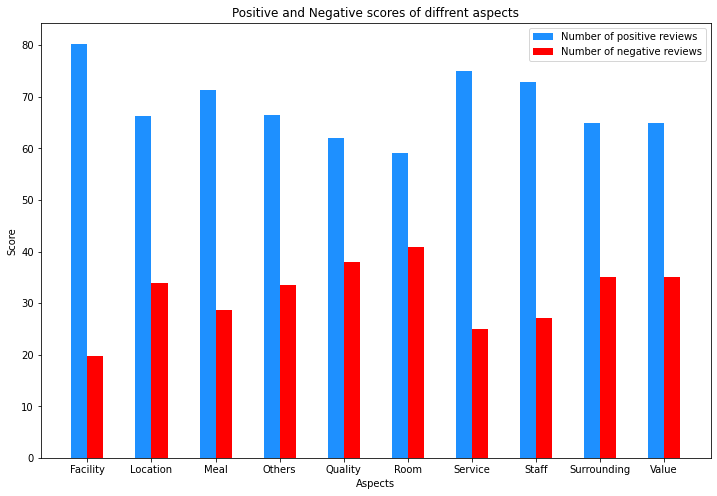

In [26]:
# barWidth
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

posScores = aspectPosScore      # Aspects positive score list
negScores = aspectNegScore      # Aspects negative score list

for i in range(0, 10):
    total = posScores[i]+negScores[i]
    posScores[i] = posScores[i]/total*100
    negScores[i] = negScores[i]/total*100

bar1 = np.arange(len(aspect))
bar2 = [i+barWidth for i in bar1]

plt.bar(bar1, posScores, barWidth, label='Number of positive reviews', color='dodgerblue')
plt.bar(bar2, negScores, barWidth, label='Number of negative reviews', color='red')

plt.xlabel("Aspects")
plt.ylabel("Score")
plt.title("Positive and Negative scores of diffrent aspects")
plt.xticks(bar1+barWidth/2, aspect)

plt.legend()
plt.show()

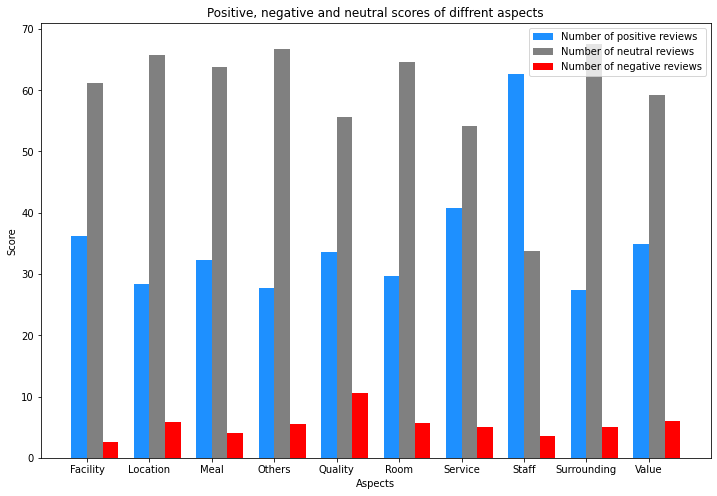

In [27]:
# barWidth
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

posScores = vaderAspectPosScore      # Aspects positive score list
negScores = vaderAspectNegScore      # Aspects negative score list
neuScores = vaderAspectNeuScore      # Aspects negative score list

for i in range(0, 10):
    total = posScores[i]+negScores[i]+neuScores[i]
    posScores[i] = posScores[i]/total*100
    negScores[i] = negScores[i]/total*100
    neuScores[i] = neuScores[i]/total*100
    
bar1 = np.arange(len(aspect))
bar2 = [i+barWidth for i in bar1]
bar3 = [i+2*barWidth for i in bar1]

plt.bar(bar1, posScores, barWidth, label='Number of positive reviews', color='dodgerblue')
plt.bar(bar2, neuScores, barWidth, label='Number of neutral reviews', color='grey')
plt.bar(bar3, negScores, barWidth, label='Number of negative reviews', color='red')

plt.xlabel("Aspects")
plt.ylabel("Score")
plt.title("Positive, negative and neutral scores of diffrent aspects")
plt.xticks(bar1+barWidth/2, aspect)

plt.legend()
plt.show()

In [28]:
# NLTK SENTIWORDNET
# https://www.nltk.org/_modules/nltk/corpus/reader/sentiwordnet.html

# stackoverflow
# https://stackoverflow.com/questions/38263039/sentiwordnet-scoring-with-python